In [3]:
# Basic Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the Dataset
data_path = r"C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/mutual-fund-recommender/data/raw/Mutual_Funds.csv"
df = pd.read_csv(data_path)

# Quick Preview
print("Data Shape:", df.shape)
df.head()


Data Shape: (29033646, 7)


,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,Date,NAV
0,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,29-05-2008,10.7205
1,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,28-05-2008,10.7250
2,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,27-05-2008,10.7216
3,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,26-05-2008,10.7206
4,Standard Chartered Mutual Fund,Open Ended Schemes,Income,100027,Grindlays Super Saver Income Fund-GSSIF-Half Y...,23-05-2008,10.7152


In [4]:
# Missing values
df.isnull().sum()

Fund_House         0
Scheme_Type        0
Scheme_Category    0
Scheme_Code        0
Scheme_Name        0
Date               0
NAV                0
dtype: int64

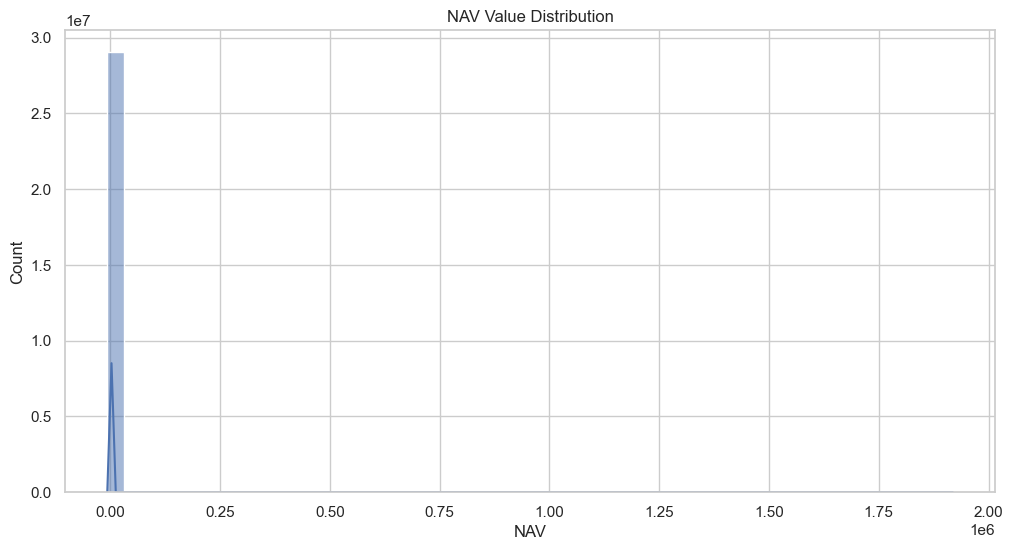

In [5]:
#Distribution of NAV Values

df['NAV'] = pd.to_numeric(df['NAV'], errors='coerce')
sns.histplot(df['NAV'].dropna(), bins=50, kde=True)
plt.title("NAV Value Distribution")
plt.xlabel("NAV")
plt.ylabel("Count")
plt.show()

C:\Users\BALA\AppData\Local\Temp\ipykernel_29592\1257703590.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


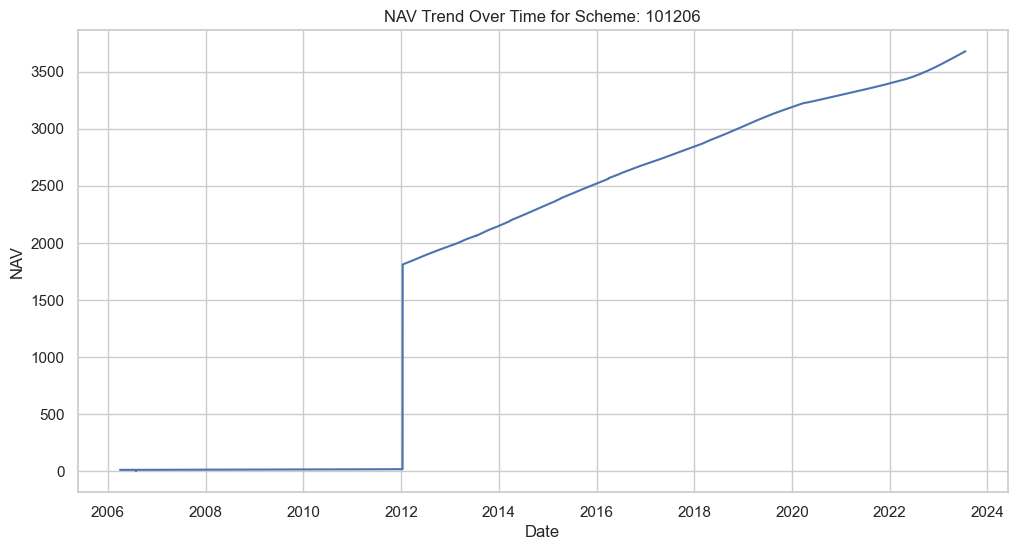

In [6]:
#NAV Over Time for Top Scheme(s)

# Convert date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Top scheme by volume
top_scheme = df['Scheme_Code'].value_counts().idxmax()
scheme_df = df[df['Scheme_Code'] == top_scheme].sort_values("Date")

plt.plot(scheme_df['Date'], scheme_df['NAV'])
plt.title(f"NAV Trend Over Time for Scheme: {top_scheme}")
plt.xlabel("Date")
plt.ylabel("NAV")
plt.grid(True)
plt.show()
